# Legoset Mean Build Times

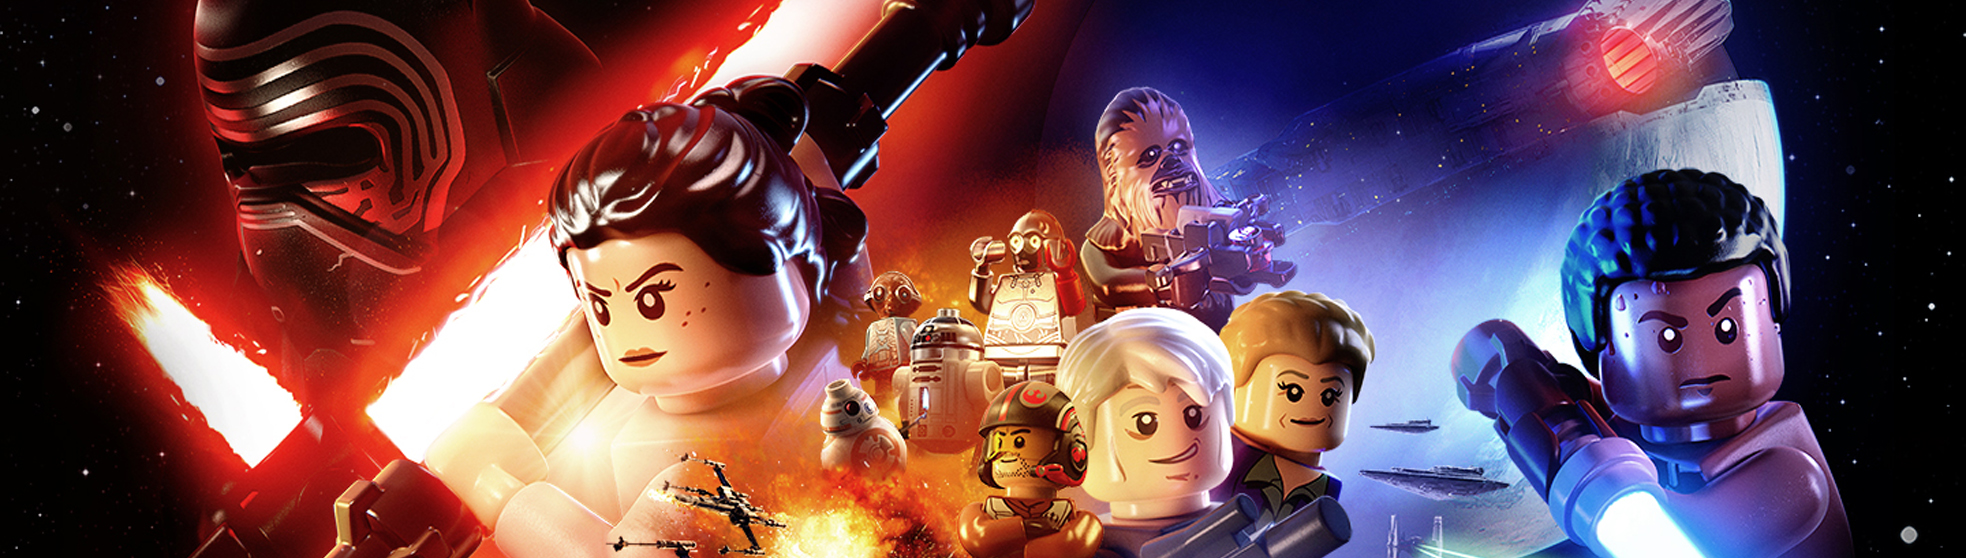

## Average build times for Slave, Snowspeeder, & Tie Fighter Lego sets:
This notebook explores the average build times of the Slave, Snowspeeder & Tie Fighter lego sets. A conversation during work sparked the question of how long one of these sets would take to build for a group of 3 to 4 with average age ranges of 25-34.
***
## Methodology & Pre-Requisite:
A script is run which scrapes the lego site using Selenoid (I previously tried Scrapy, but due to the site's dynamic java script, had to use Selenoid as a workaround). The script stores the model names, reviewers age range and build time (which is converted into minutes) in JSON format in /tmp/ folder. Download the legoset_meanbuildtimes.py script and run via the terminal window, you may need to run the following before running the legoset script:

<br>`brew install chromedriver`
If the brew command does not work, you may need to try installing brew via:

<br>`/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`

Also, before running the script be sure to put a file called lego_urls.txt in the /tmp folder with the desired urls, you can see an included example called "lego_urls.txt":

<br>`python legoset_meanbuildtimes.py -f /tmp/lego_urls.txt`

<br>You also need to parse shop.lego.com for specific lego set's and collect all the information contained in the reviews that it dumps as a JSON dictionary to 

<br>`/tmp/lego.json` 

<br>You can change the urls that the script scrapes via the `/tmp/lego_urls.txt` file. After the script is finished, please make sure the follwing dependencies are installed prior to running the required visualizations.
***

## Dependencies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

# Import the following dependecies:
# pandas and reference as pd because <insert reason here>
# import numpy and reference as np because <insert reason here>
# import matploglib and reference as plt because <insert reason here>
# import JSON library because that is the file format our data is in son!

## Data Import:

In [2]:
data = json.loads(open('/tmp/lego.json').read())
df1 = pd.DataFrame(data)

# Initial data import and definig of data frame, uses json.loads to read the lego.json file containing 
# the recently scraped reviews.

## Data Normalized:

In [3]:
from pandas.io.json import json_normalize
df2 = json_normalize(data,'reviews',['name','count'])

# Clip the data frame by normalizing the data using json_normalize, to take care of reviews with
# missing build times, age ranges, etc.

In [38]:
df3 = df2.groupby(['name','age','count'])['time_mins'].mean()
df3

# This reduces the data frame by calculating the mean for an age froup for each respective lego set
# we can use the 'df3' command to show the following:

name               age          count
Slave-I-75060      14-18        1996     1284.928571
                   19-24        1996      827.583333
                   25-34        1996     1330.151515
                   35-44        1996     1603.116279
                   45-54        1996     1230.000000
                   55-64        1996      360.000000
                   65 or older  1996     2880.000000
Snowspeeder-75144  14-18        1703      945.714286
                   19-24        1703      325.000000
                   25-34        1703     2377.727273
                   35-44        1703      940.315789
                   45-54        1703     2727.857143
                   55-64        1703     1620.000000
                   65 or older  1703     4320.000000
TIE-Fighter-75095  14-18        1685      368.769231
                   19-24        1685     1175.833333
                   25-34        1685     1242.250000
                   35-44        1685     1728.550000
        

## Data Visualization

In [5]:
%matplotlib inline

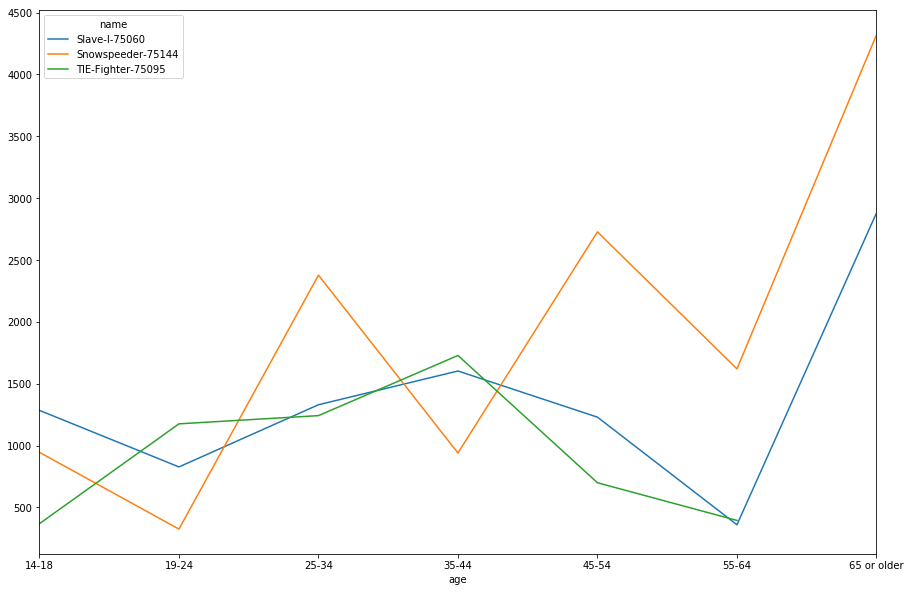

In [6]:
df3.unstack('name').plot(kind='line',figsize=(15,10),legend=True)

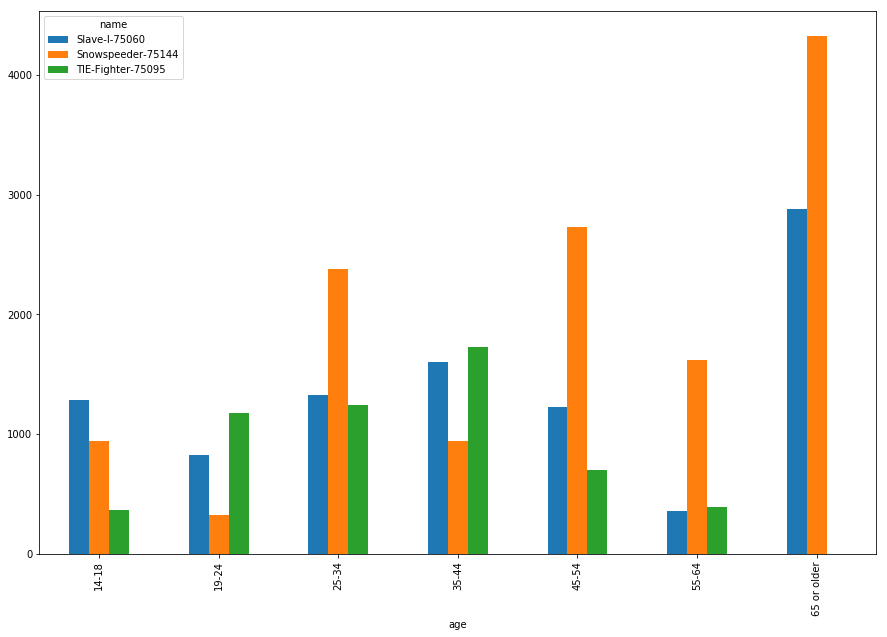

In [7]:
df3.unstack('name').plot(kind='bar',figsize=(15,10),legend=True)

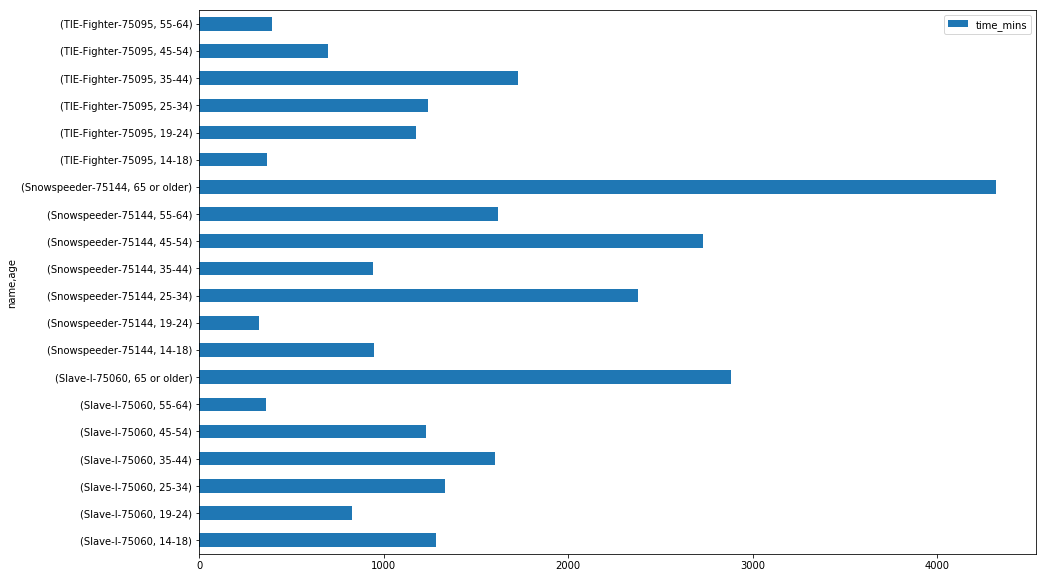

In [10]:
df3.plot.barh(stacked=True,figsize=(15,10),legend=True);